In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression as LR
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
data = load_breast_cancer()

In [4]:
X = data.data
y = data.target

In [5]:
X.shape

(569, 30)

In [6]:
y.shape

(569,)

In [7]:
lrl1 = LR(penalty="l1",solver="liblinear",C=0.5,max_iter=1000)
lrl2 = LR(penalty="l2",solver="liblinear",C=0.5,max_iter=1000)

In [9]:
lrl1 = lrl1.fit(X,y)
lrl2 = lrl2.fit(X,y)

In [10]:
lrl1.coef_

array([[ 3.9968897 ,  0.03184818, -0.13643499, -0.01623002,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.5042098 ,  0.        , -0.07128851,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        , -0.2457395 , -0.12862111, -0.01440767,  0.        ,
         0.        , -2.04550566,  0.        ,  0.        ,  0.        ]])

In [13]:
(lrl1.coef_ != 0).sum()

10

In [14]:
lrl2.coef_

array([[ 1.61543234e+00,  1.02284415e-01,  4.78483684e-02,
        -4.43927107e-03, -9.42247882e-02, -3.01420673e-01,
        -4.56065677e-01, -2.22346063e-01, -1.35660484e-01,
        -1.93917198e-02,  1.61646580e-02,  8.84531037e-01,
         1.20301273e-01, -9.47422278e-02, -9.81687769e-03,
        -2.37399092e-02, -5.71846204e-02, -2.70190106e-02,
        -2.77563737e-02,  1.98122260e-04,  1.26394730e+00,
        -3.01762592e-01, -1.72784162e-01, -2.21786411e-02,
        -1.73339657e-01, -8.79070550e-01, -1.16325561e+00,
        -4.27661014e-01, -4.20612369e-01, -8.69820058e-02]])

In [16]:
(lrl2.coef_ == 0).sum()

0

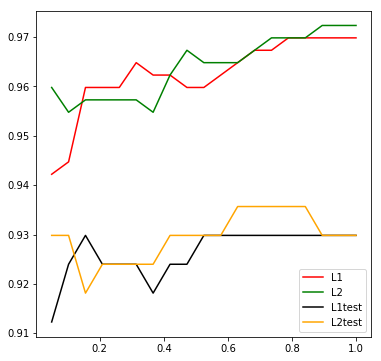

In [23]:
# C的学习曲线
l1 = []
l2 = []
l1test = []
l2test = []
Xtrain,Xtest,Ytrain,Ytest = train_test_split(X,y,test_size=0.3,random_state=420)

for i in np.linspace(0.05,1,19):
    lrl1 = LR(penalty="l1",solver="liblinear",C=i,max_iter=1000)
    lrl1 = lrl1.fit(Xtrain,Ytrain)
    l1.append(accuracy_score(lrl1.predict(Xtrain),Ytrain))
    l1test.append(accuracy_score(lrl1.predict(Xtest),Ytest))
    
    lrl2 = LR(penalty="l2",solver="liblinear",C=i,max_iter=1000)
    lrl2 = lrl2.fit(Xtrain,Ytrain)
    l2.append(accuracy_score(lrl2.predict(Xtrain),Ytrain))
    l2test.append(accuracy_score(lrl2.predict(Xtest),Ytest))
    
colors = ["red","green","black","orange"]
labels = ["L1","L2","L1test","L2test"]
graph = [l1,l2,l1test,l2test]

plt.figure(figsize=[6,6])
for i in range(len(graph)):
    plt.plot(np.linspace(0.05,1,19),graph[i],color=colors[i],label=labels[i])
plt.legend(loc=4)
plt.show()

In [28]:
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import cross_val_score

In [25]:
data = load_breast_cancer()

In [26]:
data.data.shape

(569, 30)

In [29]:
LR_ = LR(solver="liblinear",C=0.8,random_state=420)
cross_val_score(LR_,data.data,data.target,cv=10).mean()

0.9508998790078644

In [30]:
X_embedded = SelectFromModel(LR_,norm_order=1).fit_transform(data.data,data.target)
X_embedded.shape

(569, 9)

In [31]:
cross_val_score(LR_,X_embedded,y,cv=10).mean()

0.9368323826808401

In [34]:
abs(LR_.fit(data.data,data.target).coef_).max()

1.9407192479360273

(0.0, 30)
(0.1021431183124225, 17)
(0.204286236624845, 12)
(0.3064293549372675, 10)
(0.40857247324969, 8)
(0.5107155915621124, 8)
(0.612858709874535, 5)
(0.7150018281869575, 5)
(0.81714494649938, 5)
(0.9192880648118025, 5)
(1.0214311831242249, 5)
(1.1235743014366475, 4)
(1.22571741974907, 3)
(1.3278605380614925, 2)
(1.430003656373915, 2)
(1.5321467746863375, 1)
(1.63428989299876, 1)
(1.7364330113111823, 1)
(1.838576129623605, 1)
(1.9407192479360273, 1)


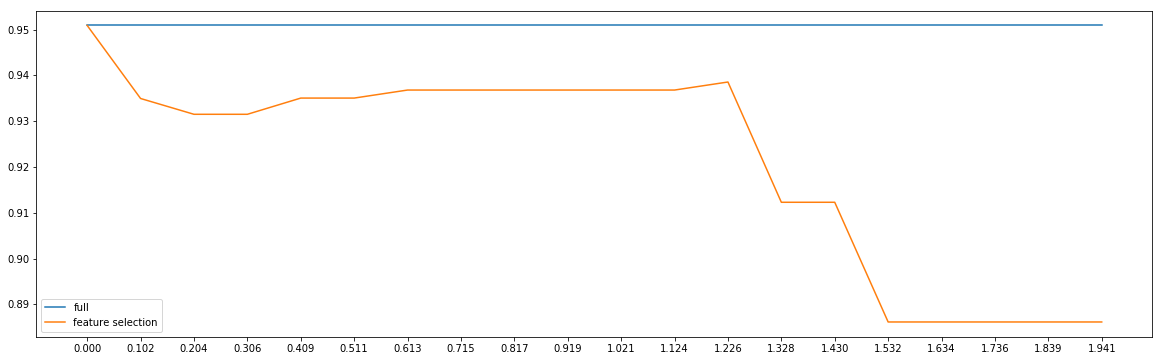

In [36]:
fullx = []
fsx = []
threshold = np.linspace(0,abs(LR_.fit(data.data,data.target).coef_).max(),20)

k = 0
for i in threshold:
    X_embedded = SelectFromModel(LR_,threshold=i).fit_transform(data.data,data.target)
    fullx.append(cross_val_score(LR_,data.data,data.target,cv=10).mean())
    fsx.append(cross_val_score(LR_,X_embedded,y,cv=10).mean())
    print((threshold[k],X_embedded.shape[1]))
    k += 1
plt.figure(figsize=[20,6])
plt.plot(threshold,fullx,label="full")
plt.plot(threshold,fsx,label="feature selection")
plt.xticks(threshold)
plt.legend()
plt.show()

由此可以看出，通过特征选择没法增强效果，只能通过调整逻辑回归的C值来尝试 了

0.9563164376458386 7.01


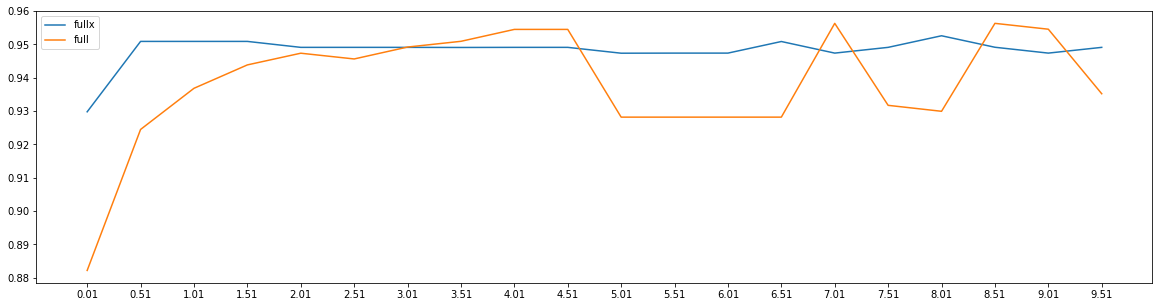

In [38]:
C = np.arange(0.01,10.01,0.5)
fullx = []
full = []
for i in C:
    LR_ = LR(solver="liblinear",C=i,random_state=420)
    fullx.append(cross_val_score(LR_,data.data,data.target,cv=10).mean())
    
    X_embedded = SelectFromModel(LR_,norm_order=1).fit_transform(data.data,data.target)
    full.append(cross_val_score(LR_,X_embedded,data.target,cv=10).mean())
print(max(full),C[full.index(max(full))])    
plt.figure(figsize=[20,5])
plt.plot(C,fullx,label="fullx")
plt.plot(C,full,label="full")
plt.xticks(C)
plt.legend()
plt.show()

In [39]:
from sklearn.model_selection import train_test_split

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
No handles with labels found to put in legend.


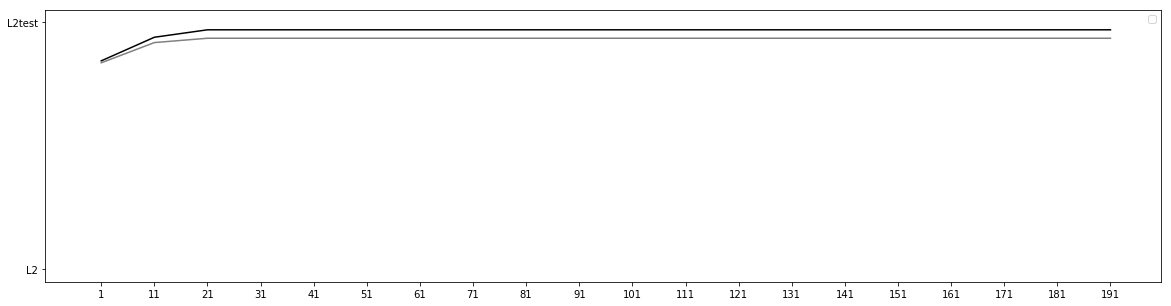

In [46]:
l2 = []
l2test = []
Xtrain,Xtest,Ytrain,Ytest = train_test_split(X,y,test_size=0.3,random_state=420)

for i in np.arange(1,201,10):
    lrl2 = LR(penalty="l2",solver="liblinear",C=0.8,max_iter=i)
    lrl2 = lrl2.fit(Xtrain,Ytrain)
    l2.append(accuracy_score(lrl2.predict(Xtrain),Ytrain))
    l2test.append(accuracy_score(lrl2.predict(Xtest),Ytest))
    
graph = [l2,l2test]
color = ["black","gray"]
label = ["L2","L2test"]
plt.figure(figsize=[20,5])
for i in range(len(graph)):
    plt.plot(np.arange(1,201,10),graph[i],color[i],label[i])
plt.xticks(np.arange(1,201,10))
plt.legend()
plt.show()

In [47]:
lr = LR(penalty="l2",solver="liblinear",C=0.8,max_iter=300).fit(Xtrain,Ytrain)
lr.n_iter_

array([24], dtype=int32)

In [48]:
from sklearn.datasets import load_iris

In [50]:
iris = load_iris()

In [51]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [54]:
for multi_class in ('multinomial','ovr'):
    lr = LR(solver='sag',max_iter=100,random_state=42,multi_class=multi_class).fit(iris.data,iris.target)

    print("training score : %.3f(%s)"%(lr.score(iris.data,iris.target),multi_class))

training score : 0.987(multinomial)
training score : 0.960(ovr)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [ ]:
LR(penalty="l1",solver="liblinear",C=0.8,max_iter=1000)
SelectFromModel(LR_,threhold/norm_order).fit_transform(Xtrain,Ytrain)
l1.append(accuracy_score(l1r1.predict(Xtrain),Ytrain))
lr = LR(penalty="l1",solver="liblinear",max_iter=100,random_state=420,multi_class=multinomial/ovr).fit(Xtrain,Ytrain)
print("training score : %.3f(%s)"%(lr.score(Xtrain,Ytrain),multi_class))

逻辑回归制作评分卡

In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression as LR

In [2]:
data = pd.read_csv(r"D:\titanic\rankingcard.csv",index_col=0)

In [3]:
data.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [4]:
data.shape

(150000, 11)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150000 entries, 1 to 150000
Data columns (total 11 columns):
SeriousDlqin2yrs                        150000 non-null int64
RevolvingUtilizationOfUnsecuredLines    150000 non-null float64
age                                     150000 non-null int64
NumberOfTime30-59DaysPastDueNotWorse    150000 non-null int64
DebtRatio                               150000 non-null float64
MonthlyIncome                           120269 non-null float64
NumberOfOpenCreditLinesAndLoans         150000 non-null int64
NumberOfTimes90DaysLate                 150000 non-null int64
NumberRealEstateLoansOrLines            150000 non-null int64
NumberOfTime60-89DaysPastDueNotWorse    150000 non-null int64
NumberOfDependents                      146076 non-null float64
dtypes: float64(4), int64(7)
memory usage: 13.7 MB


In [6]:
data.drop_duplicates(inplace=True)

In [7]:
data.shape

(149391, 11)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149391 entries, 1 to 150000
Data columns (total 11 columns):
SeriousDlqin2yrs                        149391 non-null int64
RevolvingUtilizationOfUnsecuredLines    149391 non-null float64
age                                     149391 non-null int64
NumberOfTime30-59DaysPastDueNotWorse    149391 non-null int64
DebtRatio                               149391 non-null float64
MonthlyIncome                           120170 non-null float64
NumberOfOpenCreditLinesAndLoans         149391 non-null int64
NumberOfTimes90DaysLate                 149391 non-null int64
NumberRealEstateLoansOrLines            149391 non-null int64
NumberOfTime60-89DaysPastDueNotWorse    149391 non-null int64
NumberOfDependents                      145563 non-null float64
dtypes: float64(4), int64(7)
memory usage: 13.7 MB


In [9]:
data.index = range(data.shape[0])

填补缺失值

In [10]:
data.isnull().sum()

SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29221
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3828
dtype: int64

In [11]:
data.isnull().sum()/data.shape[0]

SeriousDlqin2yrs                        0.000000
RevolvingUtilizationOfUnsecuredLines    0.000000
age                                     0.000000
NumberOfTime30-59DaysPastDueNotWorse    0.000000
DebtRatio                               0.000000
MonthlyIncome                           0.195601
NumberOfOpenCreditLinesAndLoans         0.000000
NumberOfTimes90DaysLate                 0.000000
NumberRealEstateLoansOrLines            0.000000
NumberOfTime60-89DaysPastDueNotWorse    0.000000
NumberOfDependents                      0.025624
dtype: float64

In [12]:
data.isnull().mean()

SeriousDlqin2yrs                        0.000000
RevolvingUtilizationOfUnsecuredLines    0.000000
age                                     0.000000
NumberOfTime30-59DaysPastDueNotWorse    0.000000
DebtRatio                               0.000000
MonthlyIncome                           0.195601
NumberOfOpenCreditLinesAndLoans         0.000000
NumberOfTimes90DaysLate                 0.000000
NumberRealEstateLoansOrLines            0.000000
NumberOfTime60-89DaysPastDueNotWorse    0.000000
NumberOfDependents                      0.025624
dtype: float64

### **随机森林填补缺失值**

In [13]:
data["NumberOfDependents"].fillna(int(data["NumberOfDependents"].mean()),inplace=True)

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149391 entries, 0 to 149390
Data columns (total 11 columns):
SeriousDlqin2yrs                        149391 non-null int64
RevolvingUtilizationOfUnsecuredLines    149391 non-null float64
age                                     149391 non-null int64
NumberOfTime30-59DaysPastDueNotWorse    149391 non-null int64
DebtRatio                               149391 non-null float64
MonthlyIncome                           120170 non-null float64
NumberOfOpenCreditLinesAndLoans         149391 non-null int64
NumberOfTimes90DaysLate                 149391 non-null int64
NumberRealEstateLoansOrLines            149391 non-null int64
NumberOfTime60-89DaysPastDueNotWorse    149391 non-null int64
NumberOfDependents                      149391 non-null float64
dtypes: float64(4), int64(7)
memory usage: 12.5 MB


In [53]:
X = data.loc[:,data.columns!="MonthlyIncome"]
y = data.loc[:,data.columns=="MonthlyIncome"]

In [54]:
X.columns.shape

(10,)

In [55]:
y.columns

Index(['MonthlyIncome'], dtype='object')

In [56]:
# 划分测试集与训练集
Ytrain = y[y.notnull()]
Ytest = y[y.isnull()]
Xtrain = X.loc[Ytrain.index,:]
Xtest = X.loc[Ytest.index,:]

In [57]:
from sklearn.ensemble import RandomForestRegressor as RFR

In [ ]:
rfr = RFR(n_estimators=100)
rfr = rfr.fit(Xtrain,Ytrain)
Ypredict = rfr.predict(Xtest)

In [15]:
def fill_missing_rf(X,y,to_fill):
    df = X.copy()
    fill = df.loc[:,to_fill]  # 新标签
    df = pd.concat([df.loc[:,df.columns!=to_fill],pd.DataFrame(y)],axis=1)  # 新特征矩阵
    
    # 找出训练集和测试集
    Ytrain = fill[fill.notnull()]
    Ytest = fill[fill.isnull()]
    Xtrain = df.loc[Ytrain.index,:]
    Xtest = df.loc[Ytest.index,:]
    
    from sklearn.ensemble import RandomForestRegressor as rfr
    X_dr = rfr(n_estimators=100)
    rfr = X_dr.fit(Xtrain,Ytrain)
    Ypredict = rfr.predict(Xtest)
    
    return Ypredict

In [16]:
X = data.loc[:,data.columns!="SeriousDlqin2yrs"]
y = data.loc[:,data.columns == "SeriousDlqin2yrs"]

In [17]:
y_pred = fill_missing_rf(X,y,"MonthlyIncome")

In [18]:
data.loc[data.loc[:,"MonthlyIncome"].isnull(),"MonthlyIncome"] = y_pred

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149391 entries, 0 to 149390
Data columns (total 11 columns):
SeriousDlqin2yrs                        149391 non-null int64
RevolvingUtilizationOfUnsecuredLines    149391 non-null float64
age                                     149391 non-null int64
NumberOfTime30-59DaysPastDueNotWorse    149391 non-null int64
DebtRatio                               149391 non-null float64
MonthlyIncome                           149391 non-null float64
NumberOfOpenCreditLinesAndLoans         149391 non-null int64
NumberOfTimes90DaysLate                 149391 non-null int64
NumberRealEstateLoansOrLines            149391 non-null int64
NumberOfTime60-89DaysPastDueNotWorse    149391 non-null int64
NumberOfDependents                      149391 non-null float64
dtypes: float64(4), int64(7)
memory usage: 12.5 MB


In [20]:
data.describe([0.01,0.1,0.25,0.5,0.75,0.9,0.99]).T

,count,mean,std,min,1%,10%,25%,50%,75%,90%,99%,max
SeriousDlqin2yrs,149391.0,0.066999,0.250021,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.0
RevolvingUtilizationOfUnsecuredLines,149391.0,6.071087,250.263672,0.0,0.0,0.003199,0.030132,0.154235,0.556494,0.978007,1.093922,50708.0
age,149391.0,52.306237,14.725962,0.0,24.0,33.000000,41.000000,52.000000,63.000000,72.000000,87.000000,109.0
NumberOfTime30-59DaysPastDueNotWorse,149391.0,0.393886,3.852953,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,4.000000,98.0
DebtRatio,149391.0,354.436740,2041.843455,0.0,0.0,0.034991,0.177441,0.368234,0.875279,1275.000000,4985.100000,329664.0
MonthlyIncome,149391.0,5425.446553,13238.187940,0.0,0.0,0.180000,1800.000000,4422.000000,7416.000000,10800.000000,23205.000000,3008750.0
NumberOfOpenCreditLinesAndLoans,149391.0,8.480892,5.136515,0.0,0.0,3.000000,5.000000,8.000000,11.000000,15.000000,24.000000,58.0
NumberOfTimes90DaysLate,149391.0,0.238120,3.826165,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,98.0
NumberRealEstateLoansOrLines,149391.0,1.022391,1.130196,0.0,0.0,0.000000,0.000000,1.000000,2.000000,2.000000,4.000000,54.0
NumberOfTime60-89DaysPastDueNotWorse,149391.0,0.212503,3.810523,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,98.0


In [21]:
data[data.loc[:,"NumberOfTimes90DaysLate"]>90].count()

SeriousDlqin2yrs                        225
RevolvingUtilizationOfUnsecuredLines    225
age                                     225
NumberOfTime30-59DaysPastDueNotWorse    225
DebtRatio                               225
MonthlyIncome                           225
NumberOfOpenCreditLinesAndLoans         225
NumberOfTimes90DaysLate                 225
NumberRealEstateLoansOrLines            225
NumberOfTime60-89DaysPastDueNotWorse    225
NumberOfDependents                      225
dtype: int64

In [22]:
data.loc[:,"NumberOfTimes90DaysLate"].value_counts()

0     141108
1       5232
2       1555
3        667
4        291
98       220
5        131
6         80
7         38
8         21
9         19
10         8
11         5
96         5
13         4
12         2
14         2
15         2
17         1
Name: NumberOfTimes90DaysLate, dtype: int64

In [23]:
data = data[data.loc[:,"NumberOfTimes90DaysLate"]<90]

In [24]:
data.index = range(data.shape[0])

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149166 entries, 0 to 149165
Data columns (total 11 columns):
SeriousDlqin2yrs                        149166 non-null int64
RevolvingUtilizationOfUnsecuredLines    149166 non-null float64
age                                     149166 non-null int64
NumberOfTime30-59DaysPastDueNotWorse    149166 non-null int64
DebtRatio                               149166 non-null float64
MonthlyIncome                           149166 non-null float64
NumberOfOpenCreditLinesAndLoans         149166 non-null int64
NumberOfTimes90DaysLate                 149166 non-null int64
NumberRealEstateLoansOrLines            149166 non-null int64
NumberOfTime60-89DaysPastDueNotWorse    149166 non-null int64
NumberOfDependents                      149166 non-null float64
dtypes: float64(4), int64(7)
memory usage: 12.5 MB


In [26]:
data.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [27]:
X = data.iloc[:,1:]
y = data.iloc[:,0]

In [29]:
y.value_counts()

0    139293
1      9873
Name: SeriousDlqin2yrs, dtype: int64

In [30]:
n_sample = X.shape[0]
n_1_sample = y.value_counts()[0]
n_0_sample = y.value_counts()[1]

In [31]:
print("样本个数：{}；1占{:.2%};0占{:.2%}".format(n_sample,n_1_sample/n_sample,n_0_sample/n_sample))

样本个数：149166；1占93.38%;0占6.62%


In [32]:
print("样本个数:{};1占{:.2%};0占{:.2%}".format(n_sample,n_1_sample/n_sample,n_0_sample/n_sample))

样本个数:149166;1占93.38%;0占6.62%


In [35]:
import imblearn

ModuleNotFoundError: No module named 'imblearn'

In [37]:
pip install imblearn

  Using cached https://files.pythonhosted.org/packages/81/a7/4179e6ebfd654bd0eac0b9c06125b8b4c96a9d0a8ff9e9507eb2a26d2d7e/imblearn-0.0-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/c8/81/8db4d87b03b998fda7c6f835d807c9ae4e3b141f978597b8d7f31600be15/imbalanced_learn-0.7.0-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/92/db/8c50996186faed765392cb5ba495e8764643b71adbd168535baf0fcae5f1/scikit_learn-0.23.2-cp37-cp37m-win_amd64.whl
  Found existing installation: scikit-learn 0.20.3
    Uninstalling scikit-learn-0.20.3:
Note: you may need to restart the kernel to use updated packages.


Could not install packages due to an EnvironmentError: [WinError 5] 拒绝访问。: 'c:\\programdata\\anaconda3\\lib\\site-packages\\scikit_learn-0.20.3.dist-info\\COPYING'
Consider using the `--user` option or check the permissions.



In [ ]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=420)
X,y = sm.fit_sample(X,y)

In [ ]:
n_sample_ = X.shape[0]

In [ ]:
X.shape

In [ ]:
pd.Series(y).value_counts()

In [ ]:
n_1_sample = pd.Series(y).value_counts()[0]
n_0_sample = pd.Series(y).value_counts()[1]

In [ ]:
print("总数是:{};1占{:.2%};0占{:%}".format(n_sample_,n_1_sample/n_sample_,n_0_sample/n_sample))

In [ ]:
from sklearn.model_selection import train_test_split
X = pd.DataFrame(X)
y = pd.DataFrame(y)
Xtrain,X_vail,Ytrain,Y_vail = train_test_split(X,y,test_size=0.3,random_state=420)

In [ ]:
model_data = pd.concat([Xtrain,Ytrain],axis=1)
model_data.index = range(model_data.shape[0])
model_data.columns = data.columns

In [ ]:
vali_data = pd.concat([X_vali,Y_vali],axis=1)
vali_data.index = range(vali_data.shape[0])
vali_data.columns = data.columns

In [ ]:
model_data.to_csv(r"")
vali_data.to_csv(r"")


In [ ]:
model_data["qcut"],updown = pd.qcut(model_data["age"],retbins=True,q=20)

In [ ]:
model_dat["qcut"].value_counts()

In [ ]:
updown